In [1]:
from utils import get_meta
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import cv2
%matplotlib inline
from tqdm import tqdm
from sklearn.cross_validation import train_test_split

from tflearn.data_utils import shuffle, to_categorical
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

plt.style.use('ggplot')


/home/geekysethi/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
db='wiki'
mat_path='/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/wiki.mat'
# mat_path='/data/wiki_crop/wiki.mat'
full_path, dob, gender, photo_taken, face_score, second_face_score, age= get_meta(mat_path, db)

temp_dataframe={"full_path":full_path,'gender':gender,'face_score':face_score,'second_face_score':second_face_score,'age':age}
df=pd.DataFrame(temp_dataframe)
print(df.head())
train_dir='/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/'
# train_dir='/data/wiki_crop/'

img_size=32
LR=1e-3
model_name='ageandgender-{}-{}.model'.format(LR,'2conv_basic')


   age  face_score                          full_path  gender  \
0   28    4.300962  [17/10000217_1981-05-05_2009.jpg]     1.0   
1   39    2.645639  [48/10000548_1925-04-04_1964.jpg]     1.0   
2   59    4.329329    [12/100012_1948-07-03_2008.jpg]     1.0   
3   31        -inf  [65/10001965_1930-05-23_1961.jpg]     1.0   
4   41    3.408442  [16/10002116_1971-05-31_2012.jpg]     0.0   

   second_face_score  
0                NaN  
1           1.949248  
2                NaN  
3                NaN  
4                NaN  


In [3]:
path=[]
type(df.full_path)
for i in df.full_path:
    i=str(i)[2:-2]
    path.append(os.path.join(train_dir,str(i)))
print(path[:10])    

['/data/wiki_crop/17/10000217_1981-05-05_2009.jpg', '/data/wiki_crop/48/10000548_1925-04-04_1964.jpg', '/data/wiki_crop/12/100012_1948-07-03_2008.jpg', '/data/wiki_crop/65/10001965_1930-05-23_1961.jpg', '/data/wiki_crop/16/10002116_1971-05-31_2012.jpg', '/data/wiki_crop/02/10002702_1960-11-09_2012.jpg', '/data/wiki_crop/41/10003541_1937-09-27_1971.jpg', '/data/wiki_crop/39/100039_1904-12-07_1982.jpg', '/data/wiki_crop/13/10004113_1946-08-26_2007.jpg', '/data/wiki_crop/22/10004122_1982-03-17_2011.jpg']


In [4]:
df.full_path=path
df.head()

,age,face_score,full_path,gender,second_face_score
0,28,4.300962,/data/wiki_crop/17/10000217_1981-05-05_2009.jpg,1.0,NaN
1,39,2.645639,/data/wiki_crop/48/10000548_1925-04-04_1964.jpg,1.0,1.949248
2,59,4.329329,/data/wiki_crop/12/100012_1948-07-03_2008.jpg,1.0,NaN
3,31,-inf,/data/wiki_crop/65/10001965_1930-05-23_1961.jpg,1.0,NaN
4,41,3.408442,/data/wiki_crop/16/10002116_1971-05-31_2012.jpg,0.0,NaN


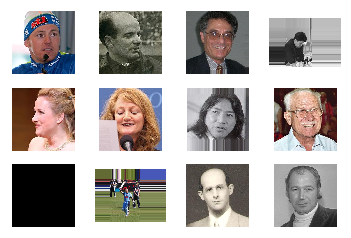

In [5]:
def show_images(path):
    fig=plt.figure()
    for num, img_no in enumerate(path[:12]):
        y=fig.add_subplot(3,4,num+1)
        img=cv2.imread(img_no,3)
        y.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)

    
show_images(path) 

In [6]:
print(df.head())
print(df.isnull().values.any())
print(df.gender.isnull().sum())
df.drop(df[df.gender.isnull()==True].index,inplace=True)
print(df.gender.isnull().sum())
print(df.head())
df[df.face_score<0]=np.nan
df.drop(df[df.face_score.isnull()==True].index,inplace=True)
print(df.head())

   age  face_score                                        full_path  gender  \
0   28    4.300962  /data/wiki_crop/17/10000217_1981-05-05_2009.jpg     1.0   
1   39    2.645639  /data/wiki_crop/48/10000548_1925-04-04_1964.jpg     1.0   
2   59    4.329329    /data/wiki_crop/12/100012_1948-07-03_2008.jpg     1.0   
3   31        -inf  /data/wiki_crop/65/10001965_1930-05-23_1961.jpg     1.0   
4   41    3.408442  /data/wiki_crop/16/10002116_1971-05-31_2012.jpg     0.0   

   second_face_score  
0                NaN  
1           1.949248  
2                NaN  
3                NaN  
4                NaN  
True
2643
0
   age  face_score                                        full_path  gender  \
0   28    4.300962  /data/wiki_crop/17/10000217_1981-05-05_2009.jpg     1.0   
1   39    2.645639  /data/wiki_crop/48/10000548_1925-04-04_1964.jpg     1.0   
2   59    4.329329    /data/wiki_crop/12/100012_1948-07-03_2008.jpg     1.0   
3   31        -inf  /data/wiki_crop/65/10001965_1930-05-23_

<function matplotlib.pyplot.plot>

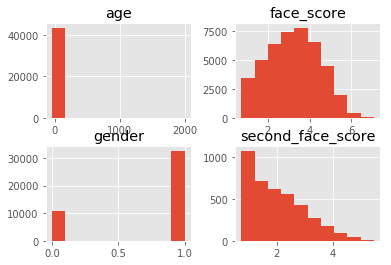

In [7]:
df.hist()
plt.plot

In [8]:
data_0=(df.full_path[df.gender==0])[:10000]
data_1=shuffle(df.full_path[df.gender==1])
data_1=data_1[0][:10000]

In [9]:
print(len(data_0))
print(len(data_1))

n_files=len(data_0)+len(data_1)
print(n_files)

allX = np.zeros((n_files, img_size, img_size, 3), dtype='float64')
ally = np.zeros(n_files)
count=0

for f in tqdm(data_0):
    img=cv2.imread(f,1)
    img=cv2.resize(img,(img_size,img_size))
    
    allX[count]=np.array(img)
    ally[count]=0
    count+=1
    
for f in tqdm(data_1):
    img=cv2.imread(f,1)
    img=cv2.resize(img,(img_size,img_size))
    allX[count]=np.array(img)
    ally[count]=1
    count+=1

# np.save('training_data_gender.npy',allX,ally)



  0%|          | 4/10000 [00:00<04:13, 39.44it/s]

10000
10000
20000


100%|██████████| 10000/10000 [04:09<00:00, 40.11it/s]


In [10]:
print(np.shape(allX))
print(np.shape(ally))


(20000, 32, 32, 3)
(20000,)


In [11]:
allX,ally=shuffle(allX,ally)
X, X_test, Y, Y_test = train_test_split(allX, ally, test_size=0.2, random_state=42)
X, Y = shuffle(X, Y) 
Y = to_categorical(Y, 2)
Y_test = to_categorical(Y_test, 2)

print(np.shape(X))
print(type(X))
print(np.shape(Y))
# print(X[:10])

(16000, 32, 32, 3)
<class 'numpy.ndarray'>
(16000, 2)


In [5]:
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Create extra synthetic training data by flipping & rotating images
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

In [6]:
###################################
# Define network architecture
###################################
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.metrics import Accuracy

# Input is a 32x32 image with 3 color channels (red, green and blue)
network = input_data(shape=[None, img_size, img_size, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug,name='')


# network = input_data(shape=[None, img_size, img_size, 3],name='input')

# 1: Convolution layer with 32 filters, each 3x3x3
conv_1 = conv_2d(network, 32, 3, activation='relu', name='conv_1')

# 2: Max pooling layer
network = max_pool_2d(conv_1, 2)

# 3: Convolution layer with 64 filters
conv_2 = conv_2d(network, 64, 3, activation='relu', name='conv_2')

# 4: Convolution layer with 64 filters
conv_3 = conv_2d(conv_2, 64, 3, activation='relu', name='conv_3')

# 5: Max pooling layer
network = max_pool_2d(conv_3, 2)

# 6: Fully-connected 512 node layer
network = fully_connected(network, 512, activation='relu')

# 7: Dropout layer to combat overfitting
network = dropout(network, 0.5)

# 8: Fully-connected layer with two outputs
network = fully_connected(network, 2, activation='softmax')

# Configure how the network will be trained
acc = Accuracy(name="Accuracy")
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.0005, metric=acc)

# Wrap the network in a model object
model = tflearn.DNN(network,tensorboard_verbose = 3, tensorboard_dir='tmp/tflearn_logs/')

###################################
# Train model for 100 epochs
###################################
# model.fit(X, Y, validation_set=(X_test, Y_test), batch_size=500,
#       n_epoch=10, run_id=model_name, show_metric=True)

# model.save(model_name)


In [7]:
model.load(model_name)

INFO:tensorflow:Restoring parameters from /home/geekysethi/Desktop/age-and-gender/age-and-gender/code/output_data/tC8zwu6VztUFj7qhx2875L/ageandgender-0.001-2conv_basic.model


INFO:tensorflow:Restoring parameters from /home/geekysethi/Desktop/age-and-gender/age-and-gender/code/output_data/tC8zwu6VztUFj7qhx2875L/ageandgender-0.001-2conv_basic.model


In [65]:
import glob
path=glob.glob('/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/test/*.jpg')
len(path)

35

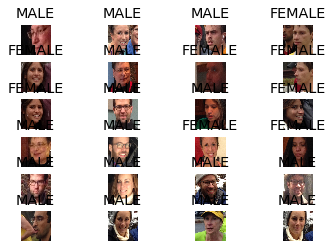

In [66]:
import matplotlib.pyplot as plt
fig=plt.figure()

for num, i in  enumerate(path[:24]):
    
    y = fig.add_subplot(6,4,num+1)
    img=cv2.imread(i,1)
    img=cv2.resize(img,(img_size,img_size))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    img=img.reshape(1,img_size,img_size,3)
    img=img.astype(float)

    model_out=model.predict(img)[0][0]
#     print(model_out)
    if (model_out)>.5:
        str_label='FEMALE'
#         print("FEMALE")

    elif (model_out)<0.5:
        str_label='MALE'
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
#     print(model_out)
    
# plt.show()

In [34]:
img=cv2.imread(path[10],1)
img=cv2.resize(img,(img_size,img_size))
img=img.reshape(1,img_size,img_size,3)
img=img.astype(float)

model.predict(img)

(1, 32, 32, 3)


array([[ 0.10583856,  0.89416146]], dtype=float32)

0.710741
FEMALE
